# DATA ANALYSIS OF PROSPER LOANS
### By Clifford Ijelekhai

## Introduction

Prosper is a peer-to-peer lending market place in the united states founded in the year 2005. Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between 2000dollars and 40000dollars. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

This analysis would focus on loans issued between July 2009 to March 2014. There are 81variables and 113937records to be explored which include the loan amount issued and the investors for the loan. However, a few variables would be selected for this analysis.

#### Questions Answered During Analysis
This analysis would answer the following question;
- What is the overall growth trend in the total amount of loans issued over the years?
- What affects the borrower’s APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?

## Priliminary Wrangling

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load In The Data

In [2]:
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


#### Assessing The Data

In [3]:
# Checking for the numbers of rows and columns of the dataset
print(loan_df.shape)
# Checking for information about the dataset
print(loan_df.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

### The structure of the dataset

> There are 113937 loan applications in the dataset with 81 features. Most of the features are numeric while some are categorical. The categorical features include both the nominal and ordinal data type. Examples of these categorical data are:
- Term: 12, 36, 60
- LoanStatus: Current, Completed, Chargedoff, Defaulted, Past Due (1-15 days), Past Due (31-60 days), Past Due (61-90 days), Past Due (91-120 days), Past Due (16-30 days), FinalPaymentInProgress, Past Due (>120 days).
- EmploymentStatus: Employed, Full-time, Self-employed, Other, Not employed, Retired,Part-time
- IncomeRange: 0, Not employed,  1-24999,  25000-49999,  50000-74999,  75000-99999, 100,000+ in dollars.




### The main feature(s) of interest

> The main features of interest are the loan original amount and Investors for the loan. I am interested in knowing how well this loans are performing and the type of loan applications investors should target.

### Features in the dataset that will help support this investigation into feature(s) of interest

> Features that would help in supporting my investigation would include: Term, LoanStatus, BorrowerAPR, BorrowerRate,
LenderYield, ProsperScore, Occupation, EmploymentStatus, IncomeRange, AmountDelinquent, LoanOriginalAmount,                   LoanOriginationDate, MonthlyLoanPayment, Investors

#### Select variables for analysis
There are 81variables in this dataset. 15 of them would be used for this data analysis

In [4]:
# The following variables would be selected for our analysis
loan_df = loan_df[['ListingNumber','Term','LoanStatus','BorrowerAPR',
                   'BorrowerRate','LenderYield','ProsperScore','Occupation','EmploymentStatus',
                   'IncomeRange','AmountDelinquent','LoanOriginalAmount',
                   'LoanOriginationDate','MonthlyLoanPayment','Investors']]
loan_df.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,Occupation,EmploymentStatus,IncomeRange,AmountDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors
0,193129,36,Completed,0.16516,0.1580,0.1380,NaN,Other,Self-employed,"$25,000-49,999",472.0,9425,9/12/2007 0:00,330.43,258
1,1209647,36,Current,0.12016,0.0920,0.0820,7.0,Professional,Employed,"$50,000-74,999",0.0,10000,3/3/2014 0:00,318.93,1
2,81716,36,Completed,0.28269,0.2750,0.2400,NaN,Other,Not available,Not displayed,NaN,3001,1/17/2007 0:00,123.32,41
3,658116,36,Current,0.12528,0.0974,0.0874,9.0,Skilled Labor,Employed,"$25,000-49,999",10056.0,10000,11/1/2012 0:00,321.45,158
4,909464,36,Current,0.24614,0.2085,0.1985,4.0,Executive,Employed,"$100,000+",0.0,15000,9/20/2013 0:00,563.97,20


In [5]:
# Getting the percentage of null values for each variable
null_var = loan_df.isnull().sum() * 100/len(loan_df)
null_var

ListingNumber           0.000000
Term                    0.000000
LoanStatus              0.000000
BorrowerAPR             0.021942
BorrowerRate            0.000000
LenderYield             0.000000
ProsperScore           25.526387
Occupation              3.149109
EmploymentStatus        1.979164
IncomeRange             0.000000
AmountDelinquent        6.689662
LoanOriginalAmount      0.000000
LoanOriginationDate     0.000000
MonthlyLoanPayment      0.000000
Investors               0.000000
dtype: float64

#### Convert LoanOriginationDate in string format to datetime

In [6]:
loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ListingNumber        113937 non-null  int64         
 1   Term                 113937 non-null  int64         
 2   LoanStatus           113937 non-null  object        
 3   BorrowerAPR          113912 non-null  float64       
 4   BorrowerRate         113937 non-null  float64       
 5   LenderYield          113937 non-null  float64       
 6   ProsperScore         84853 non-null   float64       
 7   Occupation           110349 non-null  object        
 8   EmploymentStatus     111682 non-null  object        
 9   IncomeRange          113937 non-null  object        
 10  AmountDelinquent     106315 non-null  float64       
 11  LoanOriginalAmount   113937 non-null  int64         
 12  LoanOriginationDate  113937 non-null  datetime64[ns]
 13  MonthlyLoanPay

#### Dropping records with missing values

In [8]:
loan_df = loan_df.dropna()
loan_df.shape

(83520, 15)

In [9]:
# Getting the percentage of null values for each variable
null_var = loan_df.isnull().sum() * 100/len(loan_df)
null_var

ListingNumber          0.0
Term                   0.0
LoanStatus             0.0
BorrowerAPR            0.0
BorrowerRate           0.0
LenderYield            0.0
ProsperScore           0.0
Occupation             0.0
EmploymentStatus       0.0
IncomeRange            0.0
AmountDelinquent       0.0
LoanOriginalAmount     0.0
LoanOriginationDate    0.0
MonthlyLoanPayment     0.0
Investors              0.0
dtype: float64

In [10]:
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,AmountDelinquent,LoanOriginalAmount,MonthlyLoanPayment,Investors
count,8.352000e+04,83520.00000,83520.000000,83520.000000,83520.000000,83520.000000,83520.000000,83520.000000,83520.000000,83520.000000
mean,7.692475e+05,42.51523,0.226863,0.196257,0.186253,5.964966,954.055472,9103.743427,292.474358,68.955759
std,2.350255e+05,11.66907,0.080115,0.074807,0.074807,2.375933,7428.515834,6300.856735,186.972102,95.511709
min,4.162750e+05,12.00000,0.045830,0.040000,0.030000,1.000000,0.000000,1000.000000,0.000000,1.000000
25%,5.565650e+05,36.00000,0.163280,0.135900,0.125900,4.000000,0.000000,4000.000000,157.960000,1.000000
50%,7.317860e+05,36.00000,0.219450,0.187500,0.177500,6.000000,0.000000,7500.000000,252.480000,33.000000
75%,9.715862e+05,60.00000,0.292540,0.257400,0.247400,8.000000,0.000000,14000.000000,389.462500,98.000000
max,1.255725e+06,60.00000,0.423950,0.360000,0.340000,11.000000,463881.000000,35000.000000,2251.510000,1189.000000


## Univariate Exploration

### Histogram of key features

I will be looking at these four key features in our dataset **BorrowerAPR, BorrowerRate, LoanOriginalAmount, Investors** to have insight into how they are distributed using a histogram.

In [11]:
def plot_hist(data, xvar, bin_var):
    """
    function for plotting histogram with data, variable and bin_size variable
    as argument
    """
    # determine number of bins for the histogram
    bin_edges = np.arange(data[xvar].min(), data[xvar].max()+bin_var, bin_var)
    # plot the histogram
    plt.hist(data=loan_df, x=xvar, bins=bin_edges)
    # label for the x-axis
    plt.xlabel(f'{xvar}')
    # label for the y-axis
    plt.ylabel('Numbers of Loan Applications')
    plt.title(f'Histogram of {xvar}')

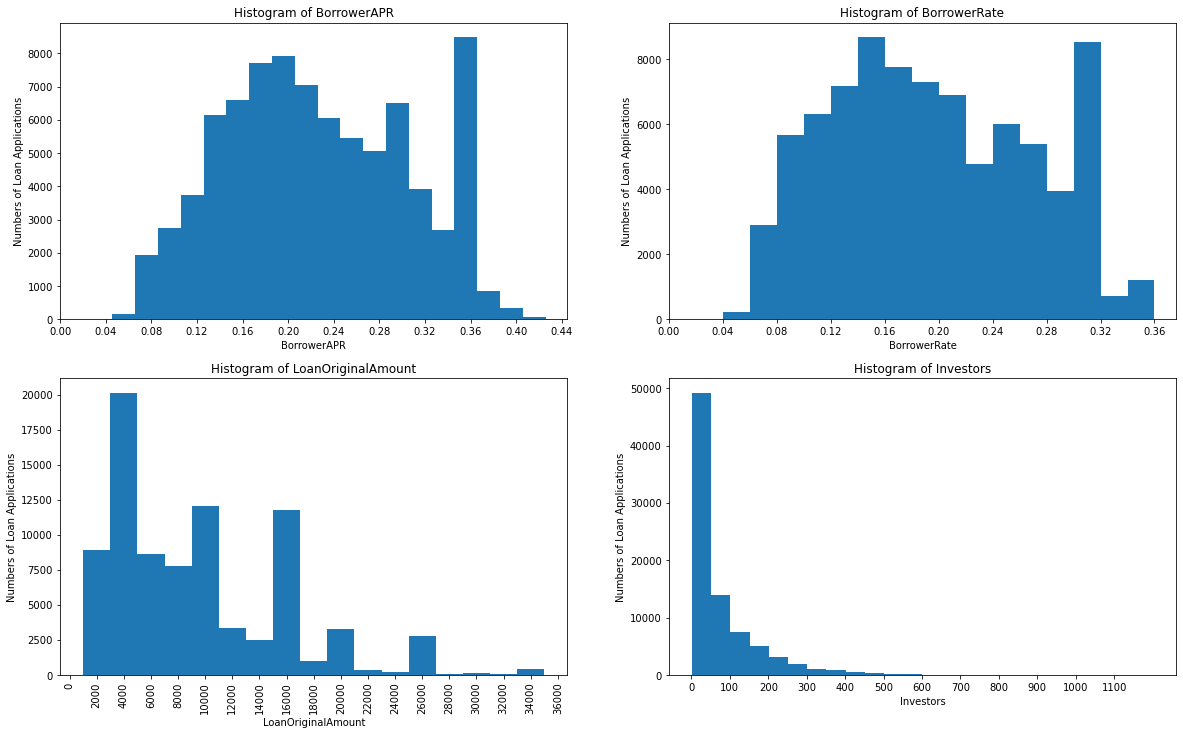

In [12]:
# Plotting all four histogram for the borrower APR, borrower rate, loan amount and investors
plt.figure(figsize=[20,12])
plt.subplot(2,2,1)
plot_hist(loan_df,'BorrowerAPR', 0.02)
plt.xticks(np.arange(0, loan_df.BorrowerAPR.max()+0.02, 0.04))

plt.subplot(2,2,2)
plot_hist(loan_df,'BorrowerRate', 0.02)
plt.xticks(np.arange(0, loan_df.BorrowerRate.max()+0.02, 0.04))

plt.subplot(2,2,3)
plot_hist(loan_df,'LoanOriginalAmount', 2000)
plt.xticks(np.arange(0, loan_df.LoanOriginalAmount.max()+2000, 2000), rotation=90)

plt.subplot(2,2,4)
plot_hist(loan_df,'Investors', 50)
plt.xticks(np.arange(0, loan_df.Investors.max(), 100));

> **Histogram of BorrowerAPR:**
The histogram appears to be uniformly distributed, however there is a high numbers of loan application with BorrowerAPR between 0.34 and 0.36. BorrowerAPR between 0.16 and 0.20 also have a high number of loan application

> **Histogram of BorrowerRate:**
This appears to be bimodial, peaking at values between 0.14-0.16 and 0.30-0.32. Beyond 0.32, there is a steep fall in the numbers of loan application

> **Histogram of LoanOriginalAmount:** 
There is a high number of loan applications with values between 3000-4000dollars. As the Loan Original Amount increases, the numbers of loan applications drop. This can be seen on the histogram as it is skewed towards the right. A lot of people also apply for loans with values around 10,000dollars and 16,000dollars

> **Histogram of Investors:**
 The histogram is conspicuously skewed to the right. This is due to the presence of outliers. Where the usual case for the numbers of investors for a specific loan is less than 50, there appear to be an instance with over 1100 investors.

### Visualizing Income Range of Loan Applicants using a Bar Chart

In [13]:
#Inspect data for all income range using value counts method
income_range = loan_df.IncomeRange.value_counts()
income_range

$50,000-74,999    25293
$25,000-49,999    23574
$100,000+         15166
$75,000-99,999    14401
$1-24,999          4392
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

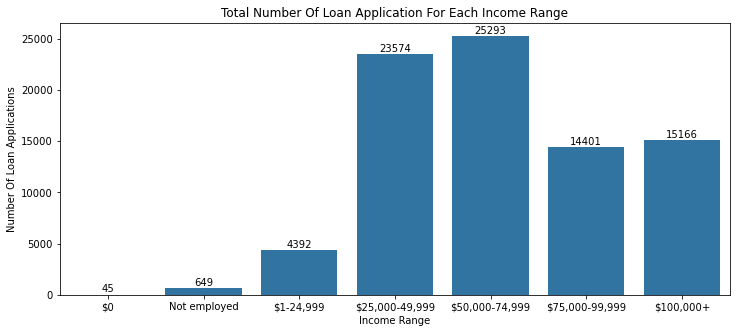

In [14]:
#Plot a barchart for the income range
plt.figure(figsize=[12,5])
base_color = sns.color_palette()[0]
order_by = ['$0','Not employed','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
income_range_ordered = [45, 649, 4392, 23574, 25293, 14401, 15166]
sns.countplot(data=loan_df, x='IncomeRange', color=base_color, order=order_by)
plt.xlabel('Income Range')
plt.ylabel('Number Of Loan Applications')
plt.title('Total Number Of Loan Application For Each Income Range')

for i in range(len(income_range_ordered)):
    count = income_range_ordered[i]
    plt.text(i, count+1000, count, ha='center', va='top');

> The bar chart reveals that there are more loan applications from average income earners. There were also loan applications from zero income earners and unemployed eventhough few.

### Visualizing Employment Status Of Loan Applicants Using A Bar chart

In [15]:
#Inspecting data for the various employment status and assigning it to a variable
employment_status = loan_df.EmploymentStatus.value_counts()
employment_status

Employed         67310
Full-time         7926
Self-employed     4538
Other             2474
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

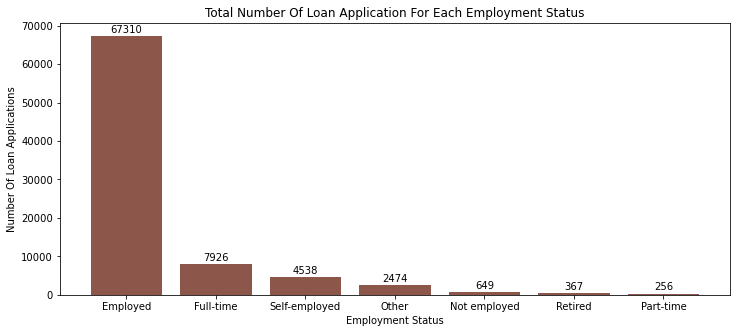

In [16]:
# plotting barchart of employment status
plt.figure(figsize=[12,5])
color = sns.color_palette()[5]
plt.bar(x=employment_status.index,height=employment_status,color=color)
plt.xlabel('Employment Status')
plt.ylabel('Number Of Loan Applications')
plt.title('Total Number Of Loan Application For Each Employment Status')
for i in range(employment_status.shape[0]):
    count = employment_status[i]
    plt.text(i, count+3000, count, ha='center', va='top');

> The Employment Status columns have 7categories. Of the 7categories, those that were employed have a significantly high numbers of loan application compared to the rest. Part-time, has the least numbers of loan applications.

### Visualizing Loan Status Variable Using Barchart

In [17]:
#Inspecting the various status of loan and assigning it to a variable
loan_status = loan_df.LoanStatus.value_counts()
loan_status

Current                   55272
Completed                 19651
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        798
Past Due (31-60 days)       358
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

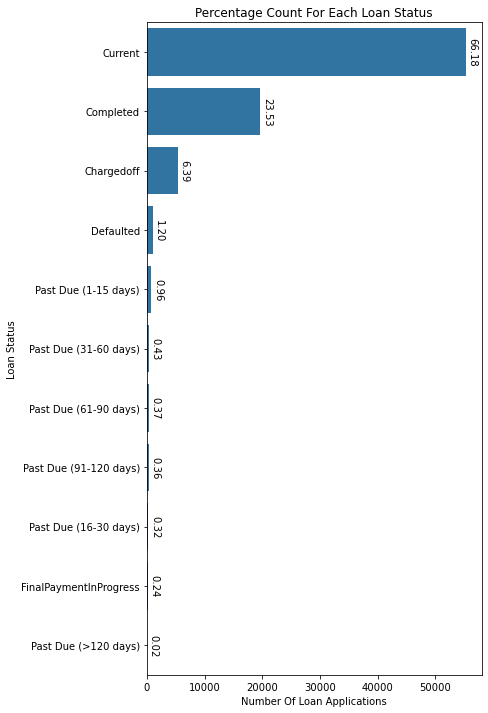

In [18]:
# Plotting histogram of the various loan status
plt.figure(figsize=[6,12])
order = loan_status.index
sns.countplot(data=loan_df, y='LoanStatus', color=base_color, order=order)

plt.xlabel('Number Of Loan Applications')
plt.ylabel('Loan Status')
plt.title('Percentage Count For Each Loan Status');

for i in range(loan_status.shape[0]):
    count = loan_status[i]
    pct_string = '{:0.2f}'.format(100*count/loan_df.shape[0])
    plt.text(count+300, i, pct_string, va='center', rotation=270)

> From the bar chart, we could see that about 66% still have their loan running while 23.53% have finish paying off their loan. The number of default is about 1.20%. About 2.4% loans have passed their due date.

## Bivariate Exploration

### Visualizing the loan status vs the BorrowerAPR using boxplot

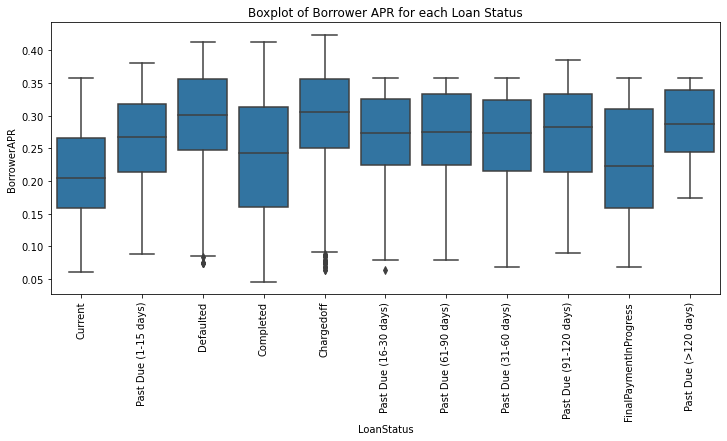

In [19]:
plt.figure(figsize=[12,5])
sns.boxplot(data=loan_df, x='LoanStatus', y='BorrowerAPR', color=base_color)
plt.title('Boxplot of Borrower APR for each Loan Status')
plt.xticks(rotation=90);

> Looking at the boxplot of LoanStatus for the various BorrowerAPR, we could see that there are hardly any outliers. Loans that are currently running has the least median BorrowerAPR. Completed loans have the highest range.

### Visualizing the Loan Status against the Loan Original amount Using Boxplot

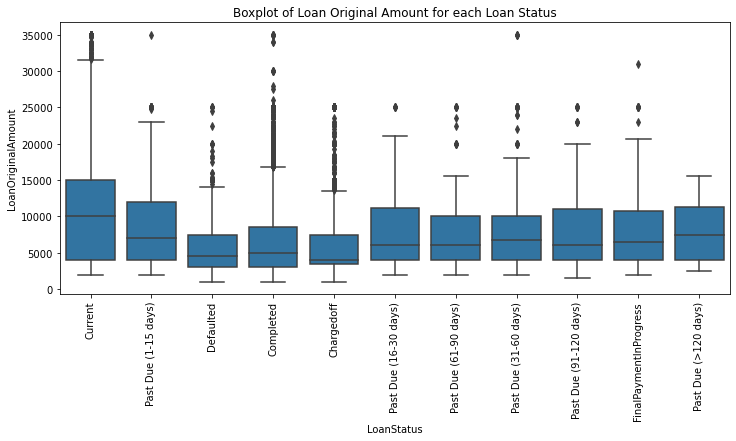

In [20]:
plt.figure(figsize=[12,5])
sns.boxplot(data=loan_df, x='LoanStatus', y='LoanOriginalAmount', color=base_color)
plt.title('Boxplot of Loan Original Amount for each Loan Status')
plt.xticks(rotation=90);

> The loan original amount has outliers for almost all status of the loan. Current running loan has the highest median amount, range and interquartile range, while the status with the least loan median amount would be the charge off.

### Has the Loan Amount Increase Over the years?
This we would found out by sorting the Loan Origination Date in ascending order and ploting a pointplot of LoanOriginalAmount against the LoanOriginationDate

In [21]:
# creating a new column callled loan origination month
loan_df['loan_Origination_month'] = loan_df['LoanOriginationDate'].dt.strftime('%m/%Y')
loan_df.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,Occupation,EmploymentStatus,IncomeRange,AmountDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,loan_Origination_month
1,1209647,36,Current,0.12016,0.0920,0.0820,7.0,Professional,Employed,"$50,000-74,999",0.0,10000,2014-03-03,318.93,1,03/2014
3,658116,36,Current,0.12528,0.0974,0.0874,9.0,Skilled Labor,Employed,"$25,000-49,999",10056.0,10000,2012-11-01,321.45,158,11/2012
4,909464,36,Current,0.24614,0.2085,0.1985,4.0,Executive,Employed,"$100,000+",0.0,15000,2013-09-20,563.97,20,09/2013
5,1074836,60,Current,0.15425,0.1314,0.1214,10.0,Professional,Employed,"$100,000+",0.0,15000,2013-12-24,342.37,1,12/2013
6,750899,36,Current,0.31032,0.2712,0.2612,2.0,Sales - Retail,Employed,"$25,000-49,999",0.0,3000,2013-04-18,122.67,1,04/2013


In [22]:
# Sorting the records by the loan origination date from the first to last date
sorted_df = loan_df.sort_values(by='LoanOriginationDate')
sorted_df.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,Occupation,EmploymentStatus,IncomeRange,AmountDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,loan_Origination_month
39013,416275,36,Completed,0.09221,0.0715,0.0615,10.0,Other,Retired,"$25,000-49,999",0.0,3500,2009-07-20,108.31,184,07/2009
18374,416283,36,Completed,0.18183,0.1600,0.1500,9.0,Other,Full-time,"$25,000-49,999",0.0,3500,2009-07-22,123.05,97,07/2009
60401,416489,36,Completed,0.39153,0.3500,0.3400,7.0,Other,Full-time,"$25,000-49,999",0.0,1000,2009-07-22,45.24,15,07/2009
109683,416353,36,Defaulted,0.29639,0.2730,0.2630,7.0,Computer Programmer,Full-time,"$25,000-49,999",0.0,6500,2009-07-23,0.00,170,07/2009
86631,416650,36,Completed,0.22895,0.2065,0.1965,8.0,Teacher,Full-time,"$50,000-74,999",0.0,2600,2009-07-24,97.49,65,07/2009


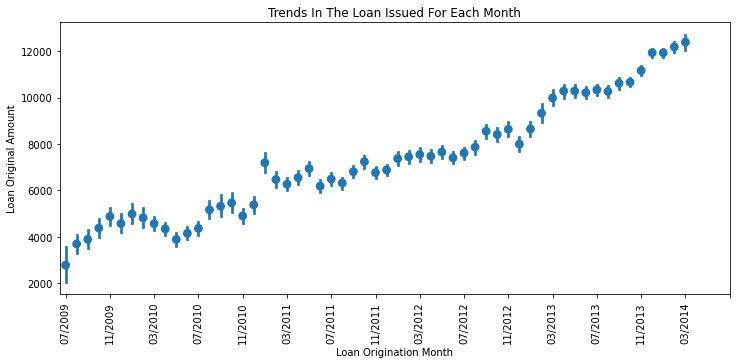

In [23]:
#Plotting a point plot of loan month against loan amount
plt.figure(figsize=[12,5])
sns.pointplot(data=sorted_df, x='loan_Origination_month', y='LoanOriginalAmount', linestyles='')
plt.xlabel('Loan Origination Month')
plt.ylabel('Loan Original Amount')
plt.title('Trends In The Loan Issued For Each Month')
plt.xticks(np.arange(0, 62, step=4), rotation=90);

> There is an upward growth of the total amount of loan requested each month from July 2009 to March 2014.

### Trends in the Lender Yield Over The Years

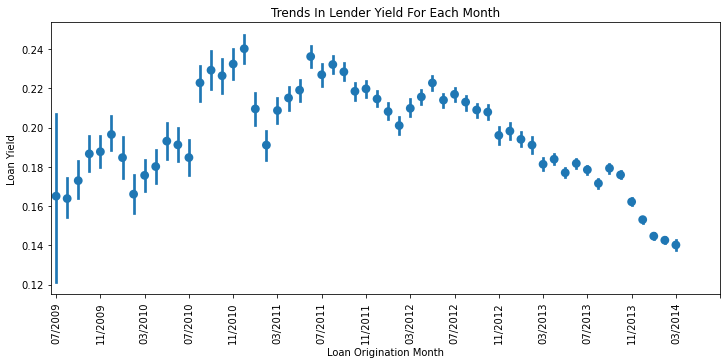

In [24]:
# Plotting a point plot of loan yield against loan amount
plt.figure(figsize=[12,5])
sns.pointplot(data=sorted_df, x='loan_Origination_month', y='LenderYield', linestyles='')
plt.xlabel('Loan Origination Month')
plt.ylabel('Loan Yield')
plt.title('Trends In Lender Yield For Each Month')
plt.xticks(np.arange(0, 62, step=4), rotation=90);

> The lender yield have varied over the years with a peak valuein December 2010. However, in recent times, the yield keeps dropping. I guess this is strategic to encourage more borrowers.

### Relationship between Investor and Loan Original Amount

In [25]:
def reg_plot(data, xvar, yvar):
    """
    function for plot a scatter plot with regression line for a give data,
    x-axis variable and y-axis variable as arguments
    """
    #Determine the size of the figure
    plt.figure(figsize=[12,5])
    #Plotting the scatter plot using seaborn regplot. 
    #alpha represent opaqueness of overlapping points
    sns.regplot(data=data, x=xvar, y=yvar, x_jitter=0.4, scatter_kws={'alpha':1/10})
    plt.xlabel(xvar)
    plt.ylabel(yvar)
    plt.title(f'Relationship between {yvar} and {xvar}');

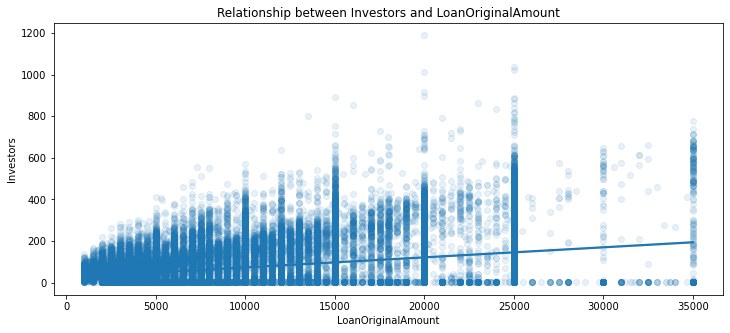

In [26]:
# calling out the reg_plot function to plot the given variables
reg_plot(loan_df, 'LoanOriginalAmount', 'Investors')

> There is a positive correlation between the loan original amount and the number of investors. As the loan amount increases, the number of investors also increases

### Relation Between Lender Yield and Loan Original Amount

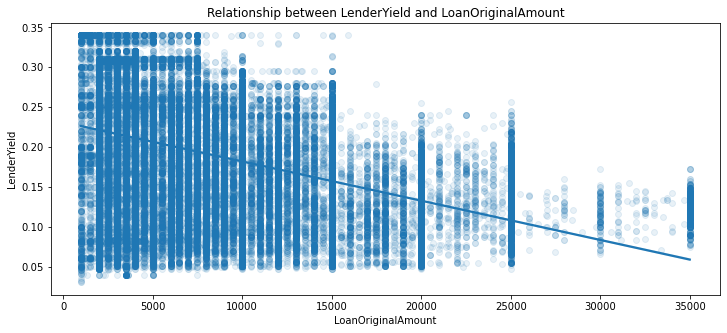

In [27]:
# calling out the reg_plot function to plot the given variables
reg_plot(loan_df, 'LoanOriginalAmount', 'LenderYield')

> The regression plot of the loan original amount and the lender yield shows a negative correlation. As the loan amount increases, the lender yield reduces.

### Relation Between BorrowerAPR and Loan Original Amount

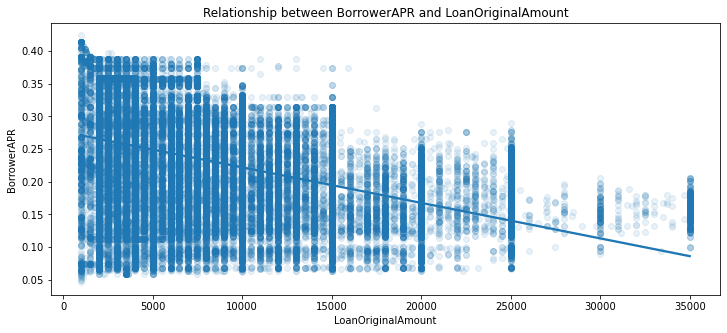

In [28]:
# calling out the reg_plot function to plot the given variables
reg_plot(loan_df, 'LoanOriginalAmount', 'BorrowerAPR')

This graph shows a negative relationship between the loan original amount and the borrower APR. As the loan original amount increases, the borrower APR reduces.

### Relationship between Income Range and Monthly Loan Repayment

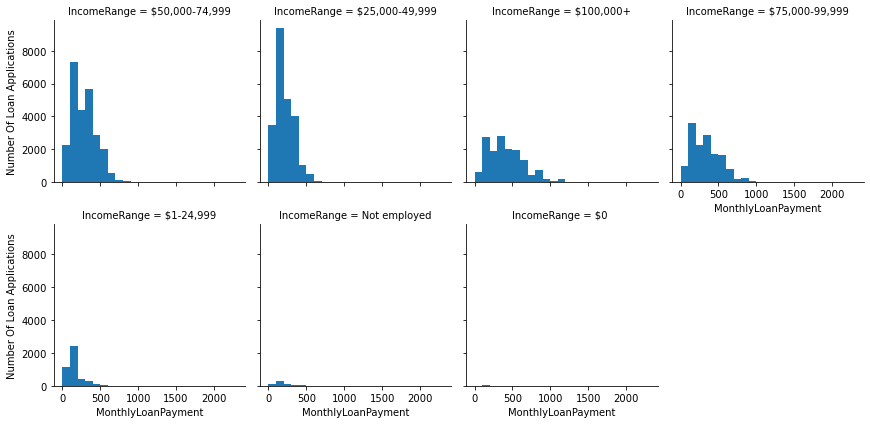

In [29]:
# using facet grid, we would plot histogram of monthly loan payment for each income range
bin_edges = np.arange(0, loan_df.MonthlyLoanPayment.max()+100, 100)
g = sns.FacetGrid(data=loan_df, col='IncomeRange', col_wrap=4)
g.map(plt.hist, 'MonthlyLoanPayment', bins=bin_edges)
g.set_axis_labels(y_var='Number Of Loan Applications');

> The monthly loan repayment is less than 500dollars in most cases. However, those with income range greater than $75,000 have a sizeable number of applications with monthly loan repayment plan greater than 500dollars. Repayment plan between 100-200dollar in the 25000-49999dollar income range has the highest number of loan applications.

### Are there differences between loans depending on how large the original loan amount was?
To investigate this, the loan original amount would be divided into three categories; small, medium and large loans.

In [30]:
# Bin edges that would be used to categories the loan original amount into groups
bin_edges = [1000, 4000, 14000, 35000]
# Labels for the categorical loan amount
bin_names = ['small', 'average', 'large']

#creating loan amount level
loan_df['loan_size'] = pd.cut(loan_df['LoanOriginalAmount'], bin_edges, labels=bin_names)

# Check for successful creation of this column
loan_df.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,Occupation,EmploymentStatus,IncomeRange,AmountDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,loan_Origination_month,loan_size
1,1209647,36,Current,0.12016,0.0920,0.0820,7.0,Professional,Employed,"$50,000-74,999",0.0,10000,2014-03-03,318.93,1,03/2014,average
3,658116,36,Current,0.12528,0.0974,0.0874,9.0,Skilled Labor,Employed,"$25,000-49,999",10056.0,10000,2012-11-01,321.45,158,11/2012,average
4,909464,36,Current,0.24614,0.2085,0.1985,4.0,Executive,Employed,"$100,000+",0.0,15000,2013-09-20,563.97,20,09/2013,large
5,1074836,60,Current,0.15425,0.1314,0.1214,10.0,Professional,Employed,"$100,000+",0.0,15000,2013-12-24,342.37,1,12/2013,large
6,750899,36,Current,0.31032,0.2712,0.2612,2.0,Sales - Retail,Employed,"$25,000-49,999",0.0,3000,2013-04-18,122.67,1,04/2013,small


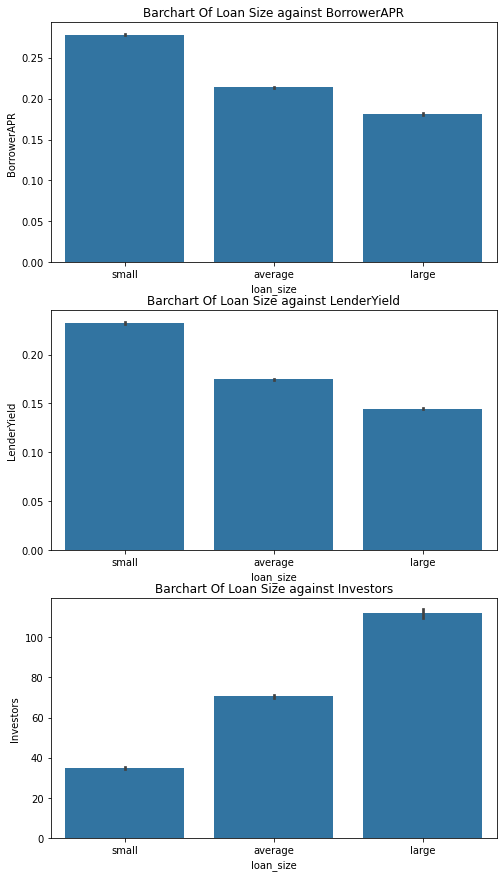

In [37]:
# Plotting a barchart for the various loan size
plt.figure(figsize=[8,15])

plt.subplot(3,1,1)
sns.barplot(x=loan_df.loan_size, y = loan_df.BorrowerAPR, color=base_color)
plt.title('Barchart Of Loan Size against BorrowerAPR')

plt.subplot(3,1,2)
sns.barplot(x=loan_df.loan_size, y = loan_df.LenderYield, color=base_color)
plt.title('Barchart Of Loan Size against LenderYield')

plt.subplot(3,1,3)
sns.barplot(x=loan_df.loan_size, y = loan_df.Investors, color=base_color)
plt.title('Barchart Of Loan Size against Investors');

## Multivariate Visualization

### Monthly Trend In Loan Amount For Each Income Range

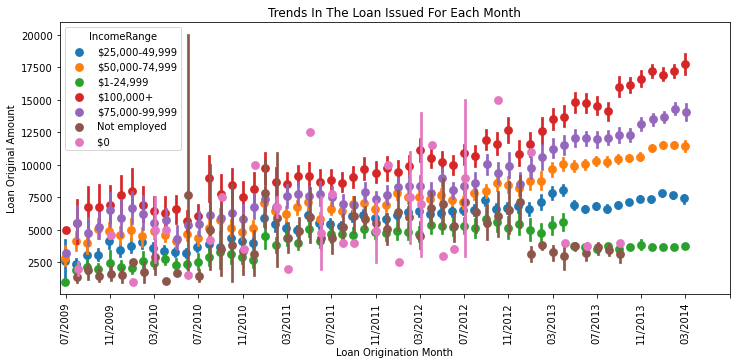

In [32]:
# plotting the monthly trend for each loan amount for each income range
plt.figure(figsize=[12,5])
sns.pointplot(data=sorted_df, x='loan_Origination_month', y='LoanOriginalAmount', linestyles='', hue='IncomeRange', dodge=True)
plt.xlabel('Loan Origination Month')
plt.ylabel('Loan Original Amount')
plt.title('Trends In The Loan Issued For Each Month')
plt.xticks(np.arange(0, 62, step=4), rotation=90);

> Generally, there is an upward growth in the loan original amount from 2009 to 2014. However, for those with zero income, the loan original amount tends to fluctuate more between high and low. For income range of 100,000+ dollars, the loan original amount requested are higher than the rest.

### Relationship between loan original amount and monthly repayment for each loan term

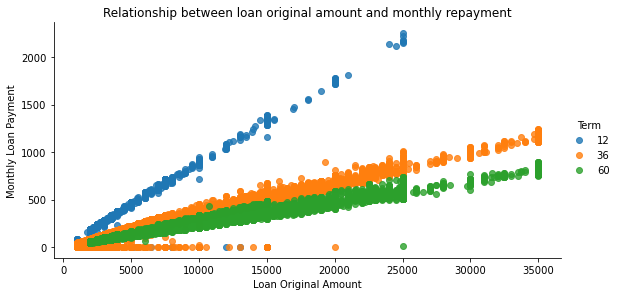

In [33]:
# Lets plot monthly loan payment for each loan term against the loan amount
g = sns.FacetGrid(data=loan_df, hue='Term', height=4, aspect=2)
g.map(sns.regplot, 'LoanOriginalAmount', 'MonthlyLoanPayment', x_jitter=0.04, fit_reg=False);
g.add_legend()
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Loan Payment')
plt.title('Relationship between loan original amount and monthly repayment');

> The short term loans (12months) have a high repayment plan compared to the long term (60months) and medium term (36months) loan. Maximum Loan Original Amount for short term loan is about 25,000dollars, while that of long and medium term loan is about 35,000dollars.

### What affects the borrower’s APR or interest rate?
To investigate this, we would visualize the relationship BorrowerAPR has with variables like LoanOriginalAmount, MonthlyLoanPayment, Investors, Term.

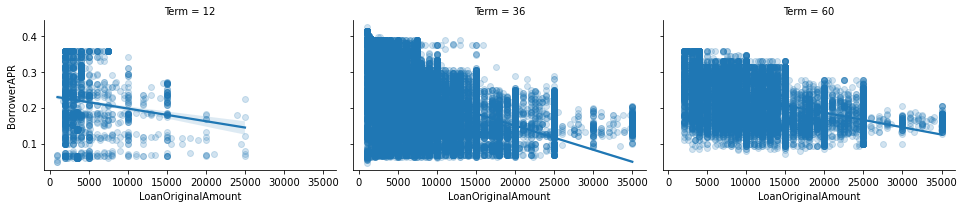

In [34]:
# Plotting a scatter plot of Loan Original Amount vs the Borrower APR for each loan term
g = sns.FacetGrid(data=loan_df, col='Term', height = 3, aspect=1.5)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws={'alpha':1/5});

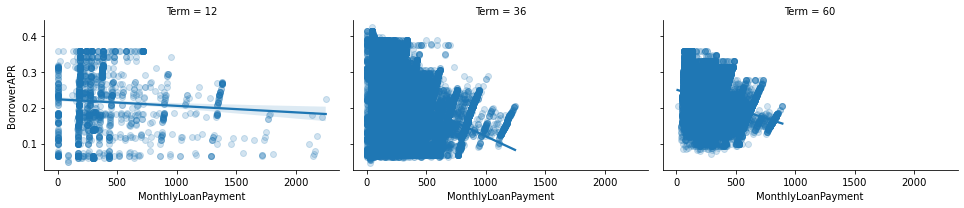

In [35]:
# Plotting a scatter plot of MonthlyLoanPayment vs the Borrower APR for each loan term
g = sns.FacetGrid(data=loan_df, col='Term', height = 3, aspect=1.5)
g.map(sns.regplot, 'MonthlyLoanPayment', 'BorrowerAPR', scatter_kws={'alpha':1/5});

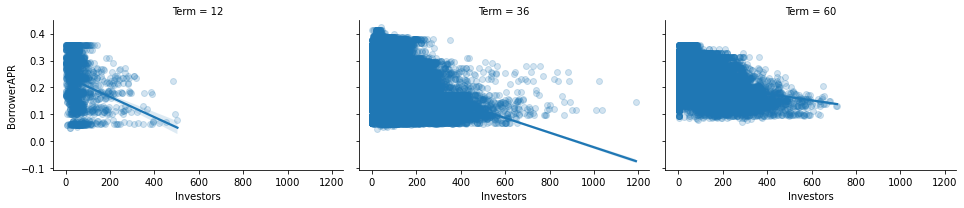

In [36]:
# Plotting a scatter plot of Investors vs the Borrower APR for each loan term
g = sns.FacetGrid(data=loan_df, col='Term', height = 3, aspect=1.5)
g.map(sns.regplot, 'Investors', 'BorrowerAPR', scatter_kws={'alpha':1/5 });

> From the figures above, we could see that as the loan original amount, monthly loan payment and investors increases, the BorrowerAPR reduces. However, there is a sharp reduction in interest rate for the 36months compared to the 12months and 60months loan.

> There are differences between loan depending on large the original amount is. The barcharts of BorrowerAPR above reveals, the average interest rate for small loans is larger than that of large loans. The LenderYield for small loans is larger than that of large loans. While the number of investors need for small loans is smaller than that of large loan.

## CONCLUSION

The data set used for this analysis is clean and tidy to a large extent. This helped in reducing the amount of time in needing to clean the data. Upon completion of the analysis, the following deductions were made:
- There is an upward growth in the amount of loan issued from 2009 to 2014.
- Loan yield started with an initial growth in 2009. In recent times, the loan yield has significantly continue to drop.
- The number of investors needed to fund a specific loan increases as the loan original amount increases.
- Interest rate and lender yield of loan original amount decreases as the amount of loan increases.
- In most cases, the monthly loan payment plan is less than 500dollars. However, for income earners above 75000dollars, the monthly payment plan can go above 500dollars.
- Short term loans have a high repayment plan than that of long term loans
- There are differences between loan depending on how large the original amount is. Large loans have smaller interest rate and lender yield compared to small loans